In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow scikit-learn matplotlib

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up GPU for faster training (optional)
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[0], 'GPU') if physical_devices else None

In [4]:
# Set paths to dataset directories
train = '/content/drive/MyDrive/traffic_sign_classification_dataset/train'
test = '/content/drive/MyDrive/traffic_sign_classification_dataset/test'

In [5]:
# Image size and batch size
img_size = (224, 224)
batch_size = 32

# Data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 4438 images belonging to 85 classes.
Found 1288 images belonging to 85 classes.


Resnet50

In [6]:
def resnet50_model():
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

VGG16

In [7]:
def vgg16_model():
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

MobilenetV2

In [8]:
def mobilenetv2_model():
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Training with all three models

In [12]:
# Train models
models = {
    "ResNet50": resnet50_model(),
    "VGG16": vgg16_model(),
    "MobileNetV2": mobilenetv2_model()
}

model_path = "best_model.keras"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)




In [13]:
history_dict = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(train_generator, epochs=15, validation_data=test_generator)
    history_dict[model_name] = history
    print(f"{model_name} Training Complete!")

Training ResNet50...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 5684s 39s/step - accuracy: 0.0451 - loss: 4.0971 - val_accuracy: 0.1211 - val_loss: 3.6317
Epoch 2/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 124s 846ms/step - accuracy: 0.0868 - loss: 3.6461 - val_accuracy: 0.1071 - val_loss: 3.4559
Epoch 3/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 126s 861ms/step - accuracy: 0.0973 - loss: 3.4931 - val_accuracy: 0.1071 - val_loss: 3.3393
Epoch 4/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 125s 869ms/step - accuracy: 0.1064 - loss: 3.3995 - val_accuracy: 0.1227 - val_loss: 3.2760
Epoch 5/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 126s 872ms/step - accuracy: 0.1127 - loss: 3.3611 - val_accuracy: 0.1273 - val_loss: 3.2654
Epoch 6/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 123s 850ms/step - accuracy: 0.1182 - loss: 3.2846 - val_accuracy: 0.1537 - val_loss: 3.2216
Epoch 7/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 141s 836ms/step - accuracy: 0.1308 - loss: 3.2686 - val_accuracy: 0.1553 - val_loss: 3.1385
Epoch 8/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 143s 836ms/step - accuracy: 0.1239 - loss: 3.190

41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ResNet50 - Accuracy: 0.2034, Precision: 0.1113, Recall: 0.2034
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step
VGG16 - Accuracy: 0.4837, Precision: 0.4867, Recall: 0.4837


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step
MobileNetV2 - Accuracy: 0.7189, Precision: 0.7404, Recall: 0.7189


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


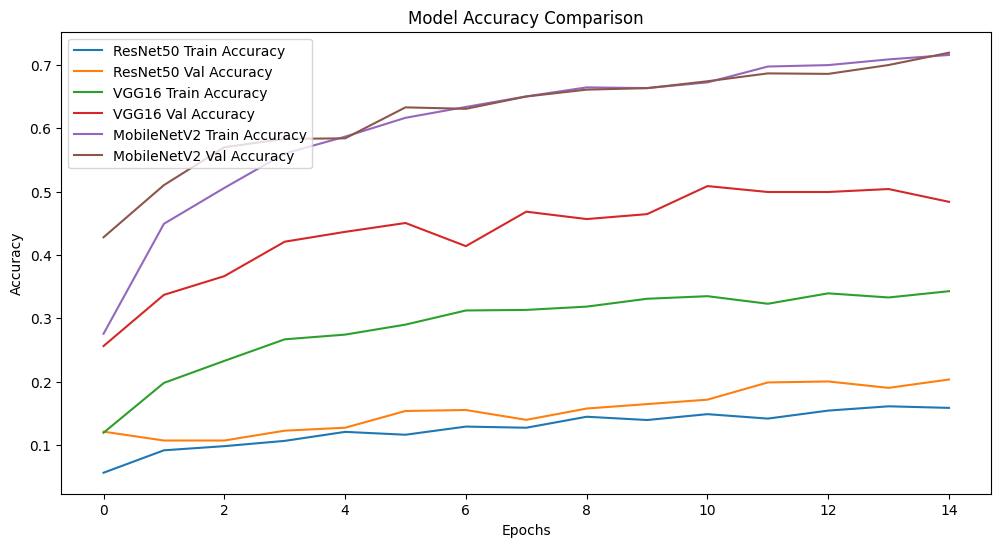

Model Evaluation Results:
ResNet50 - Accuracy: 0.2034, Precision: 0.1113, Recall: 0.2034
VGG16 - Accuracy: 0.4837, Precision: 0.4867, Recall: 0.4837
MobileNetV2 - Accuracy: 0.7189, Precision: 0.7404, Recall: 0.7189


In [16]:
# Evaluate models and calculate precision, recall, accuracy
def evaluate_model(model, test_generator):
    y_true = test_generator.classes
    y_pred = model.predict(test_generator, verbose=1)
    y_pred_classes = y_pred.argmax(axis=-1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')

    return accuracy, precision, recall

results = {}
for model_name, model in models.items():
    accuracy, precision, recall = evaluate_model(model, test_generator)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# Plotting the training and validation accuracy for each model
plt.figure(figsize=(12, 6))
for model_name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Val Accuracy')

plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# You can also print the results comparison
print("Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}")

Confusion Matrix for ResNet50
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step


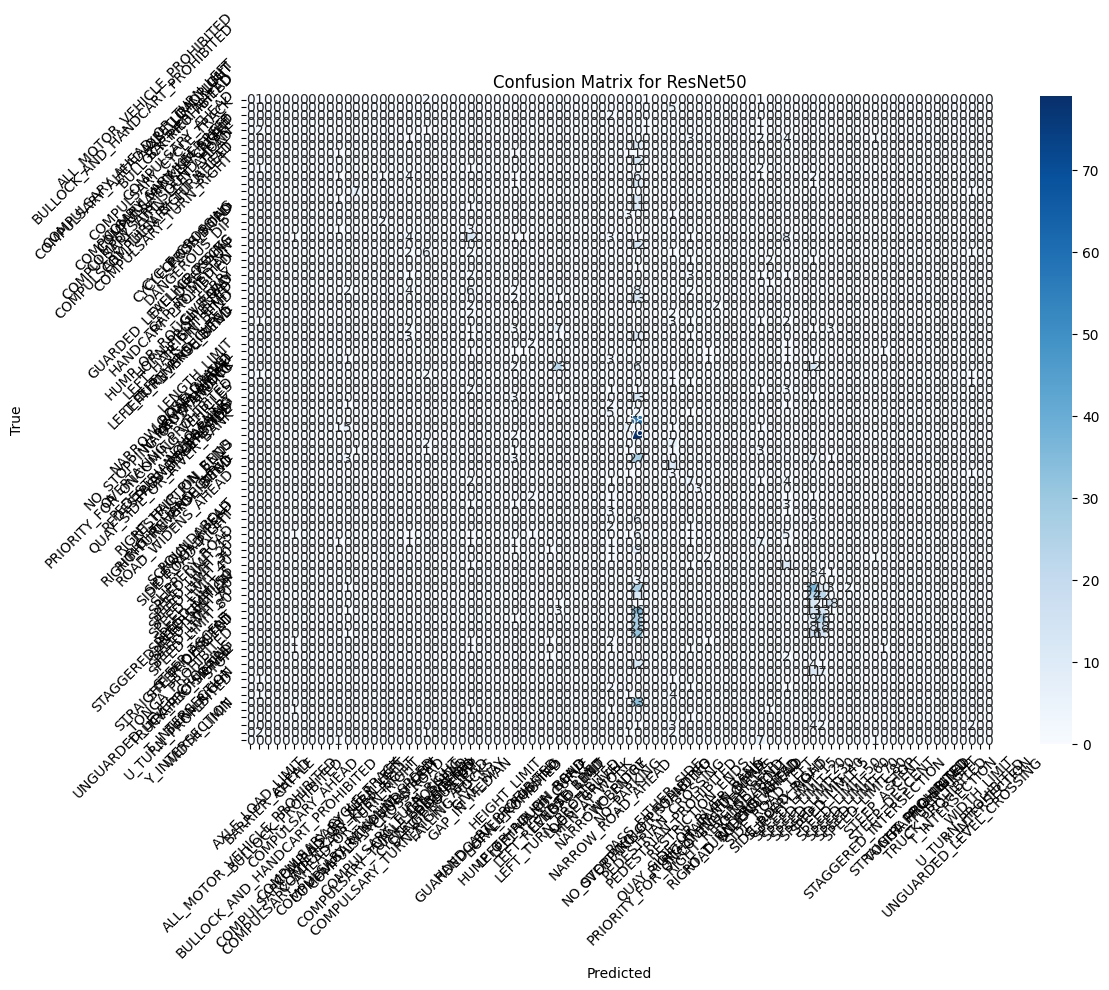

Confusion Matrix for VGG16
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step


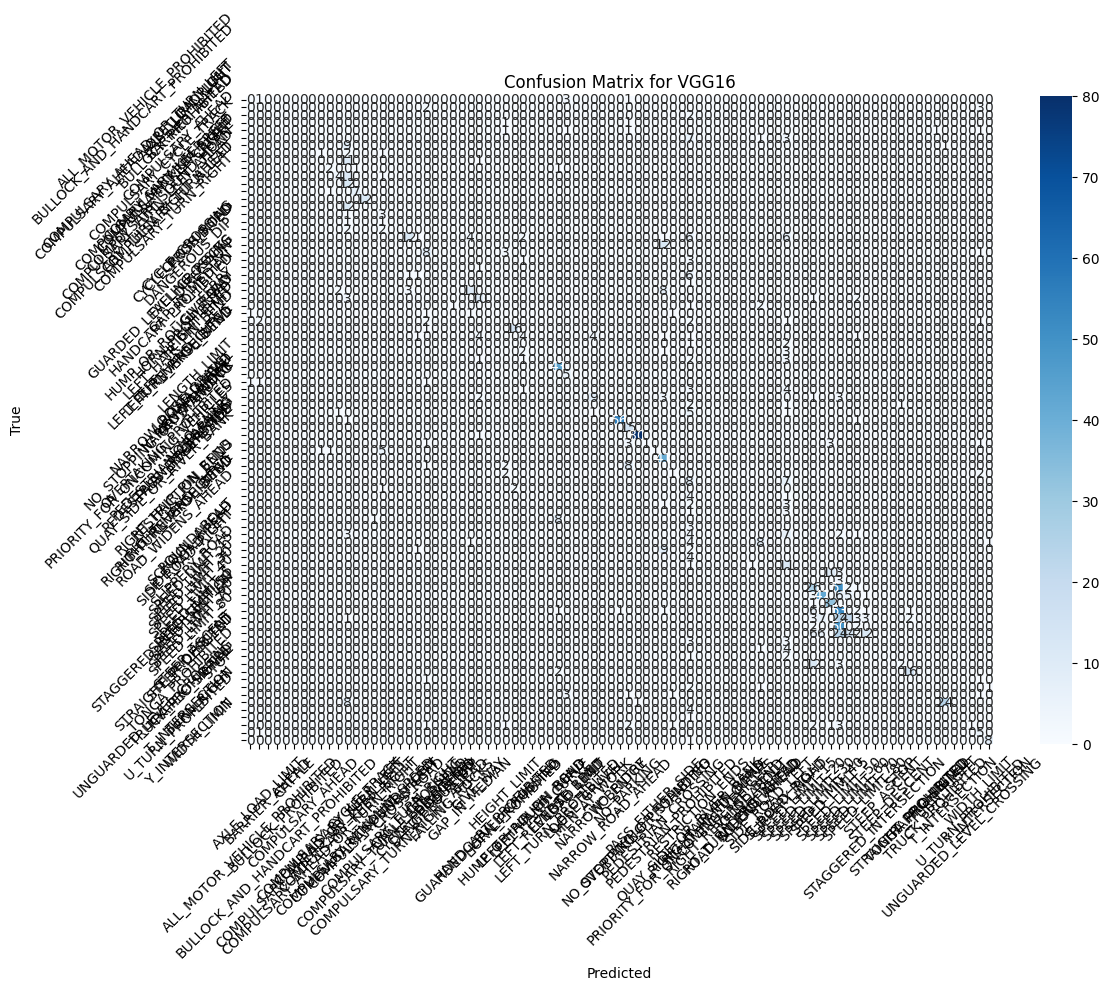

Confusion Matrix for MobileNetV2
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step


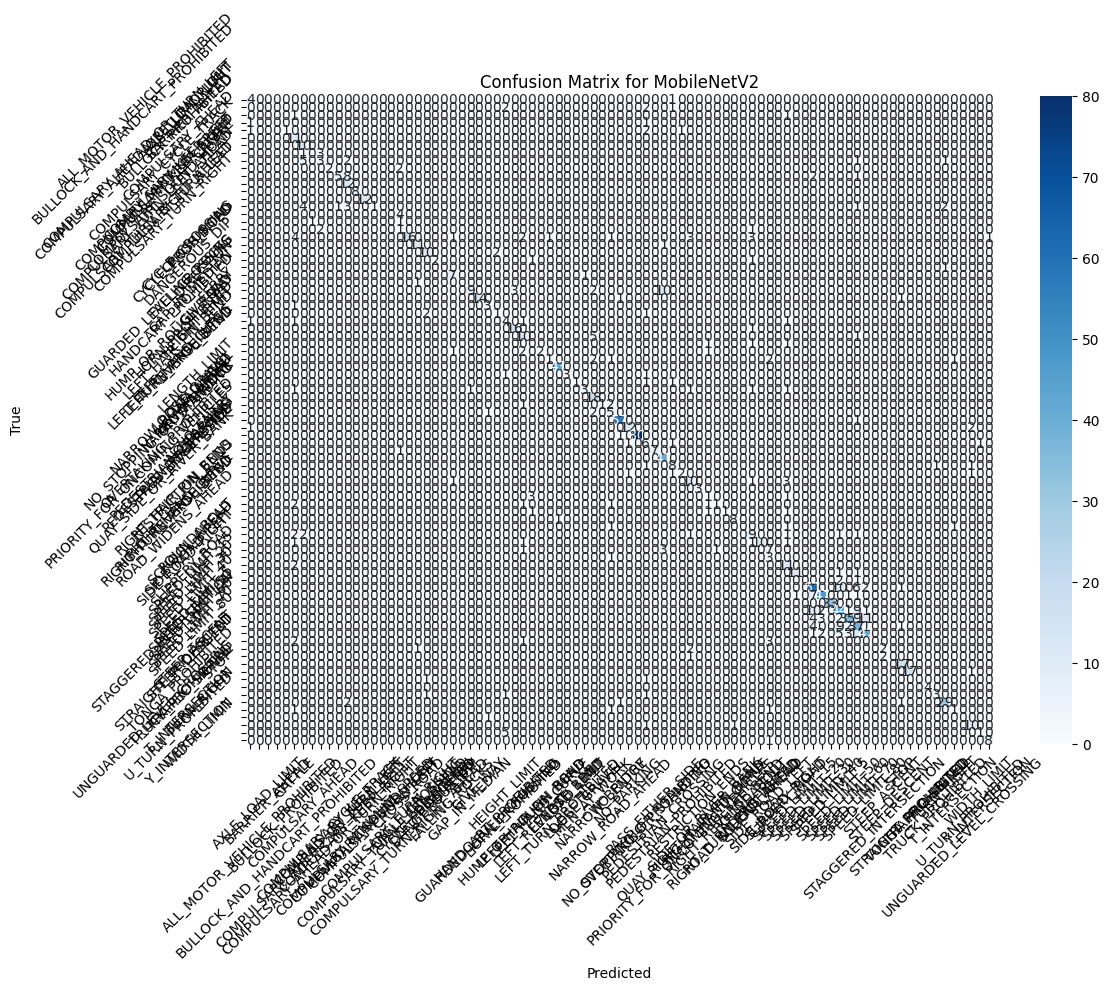

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_generator, model_name):
    y_true = test_generator.classes
    y_pred = model.predict(test_generator, verbose=1)
    y_pred_classes = y_pred.argmax(axis=-1)

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    class_labels = list(test_generator.class_indices.keys())

    # Plot the confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}")
    plot_confusion_matrix(model, test_generator, model_name)


Confusion Matrix for ResNet50
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step


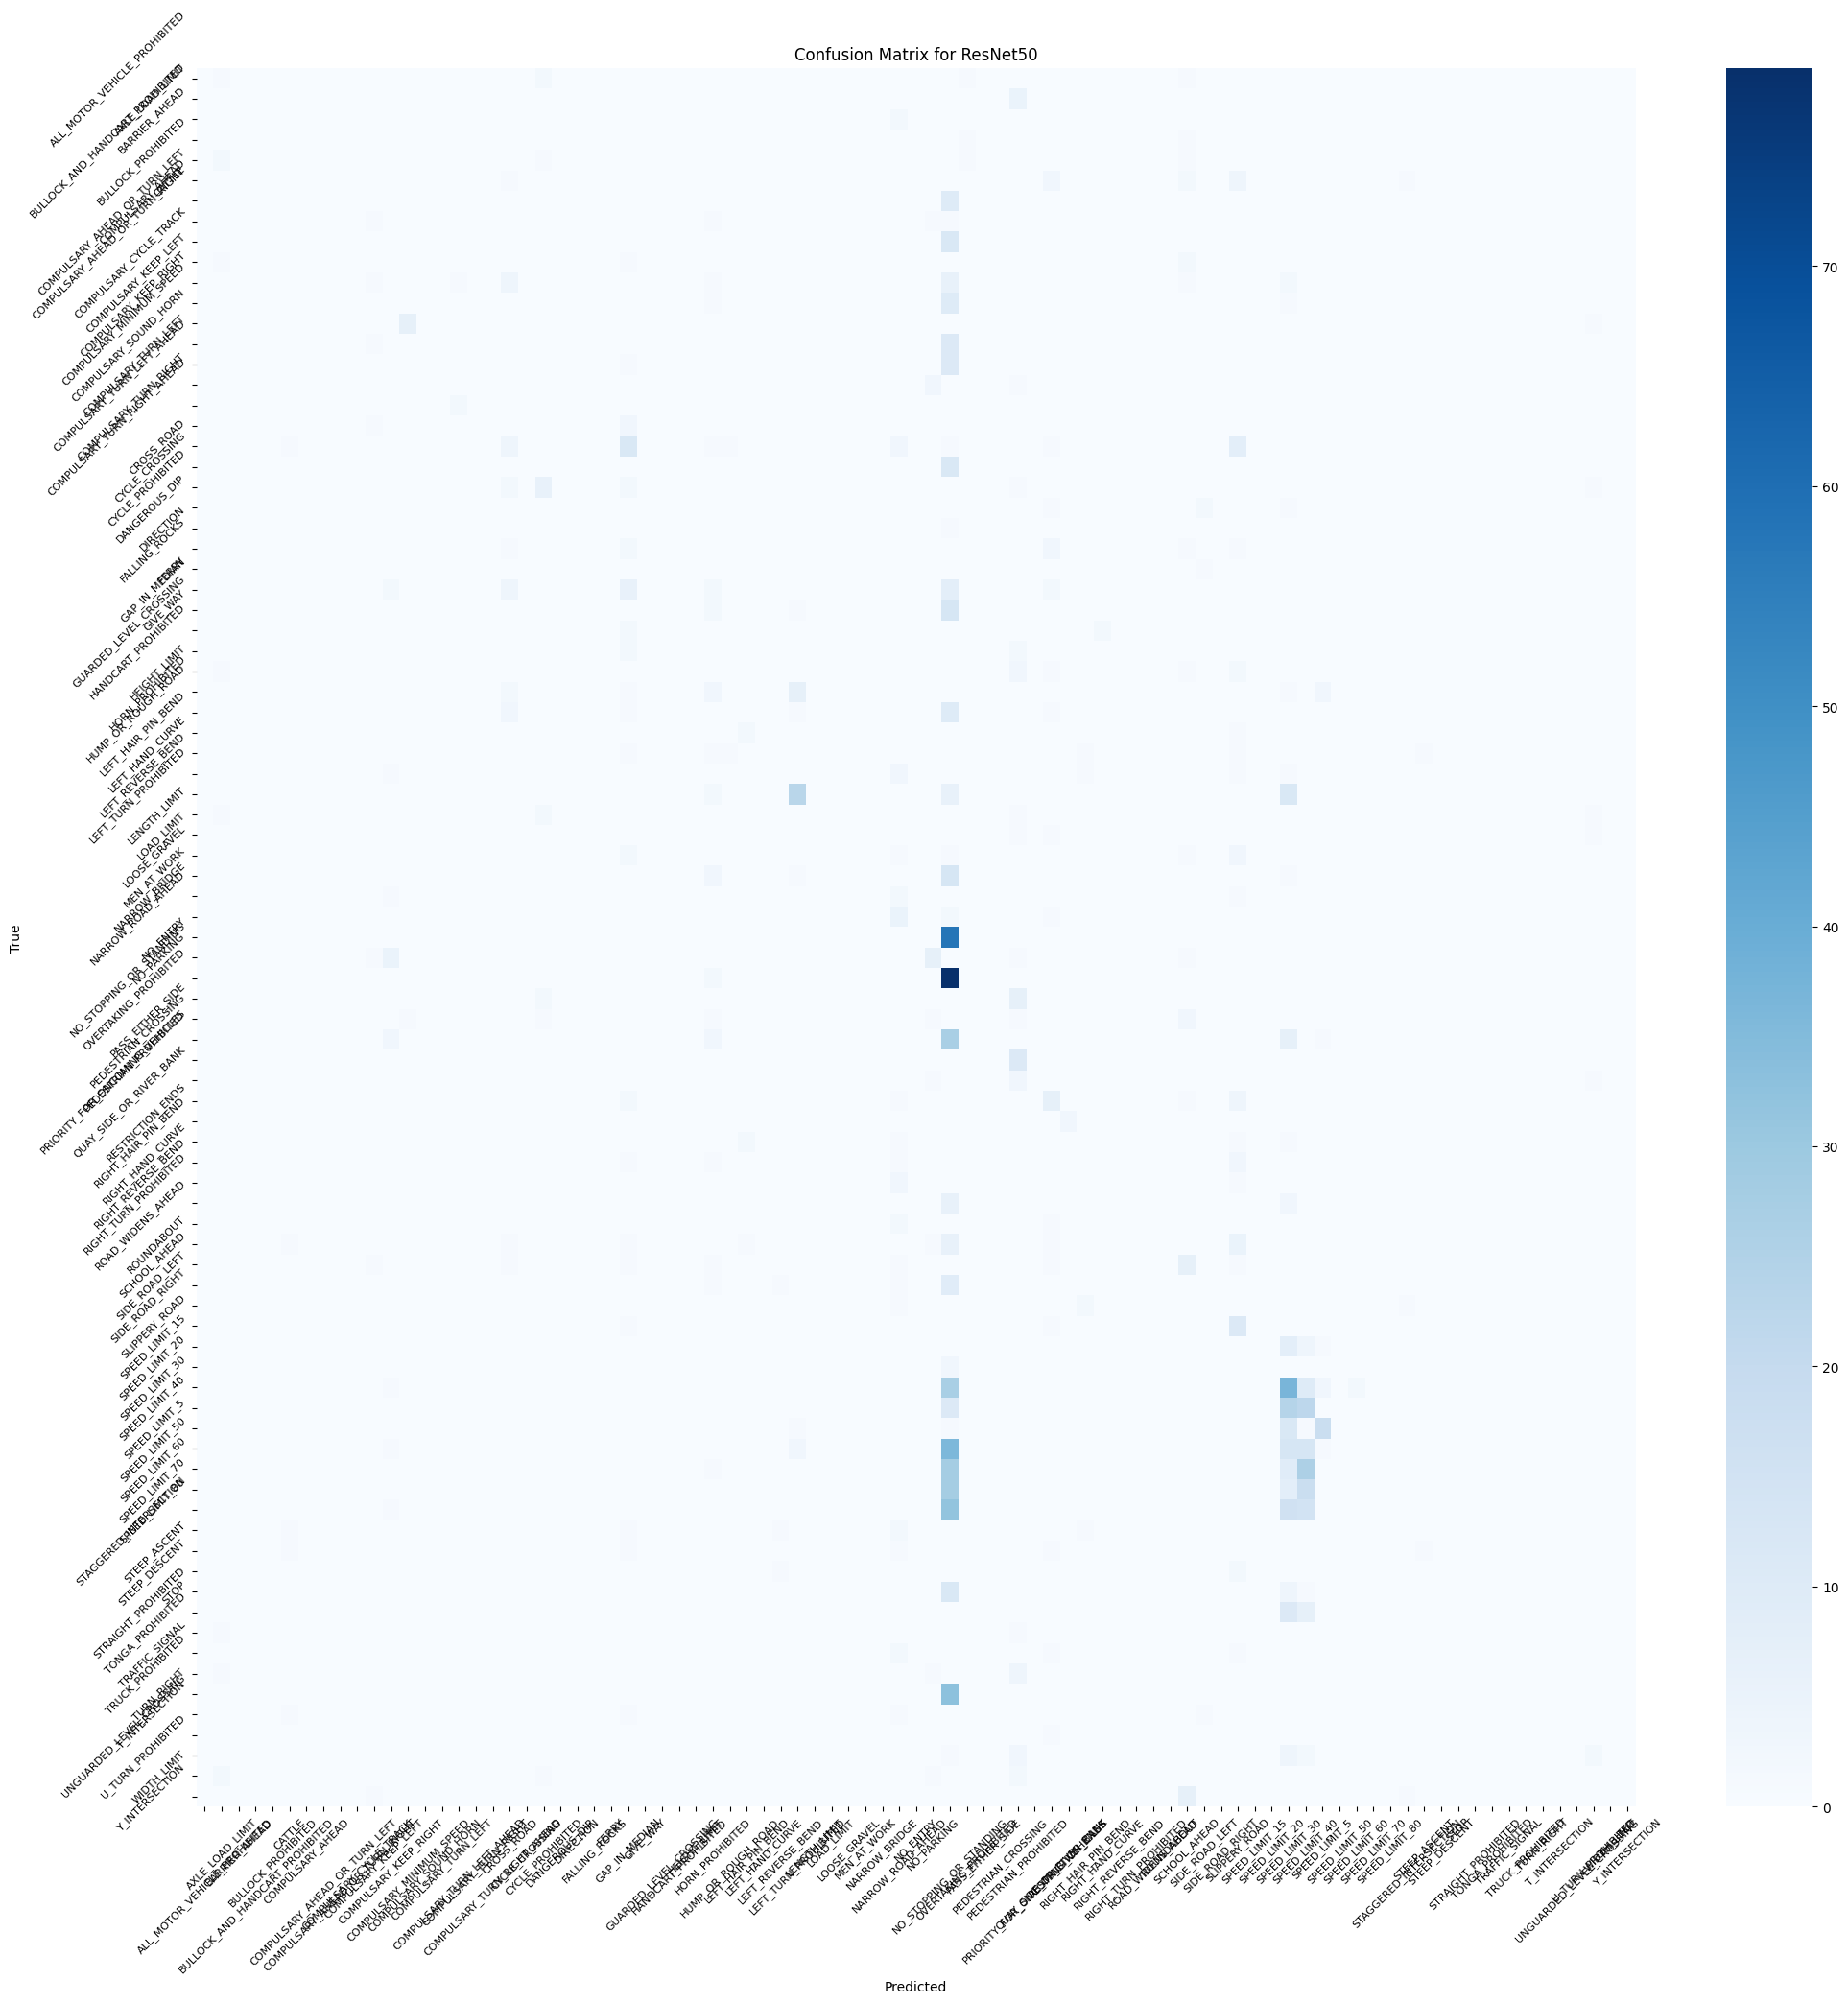

Confusion Matrix for VGG16
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step


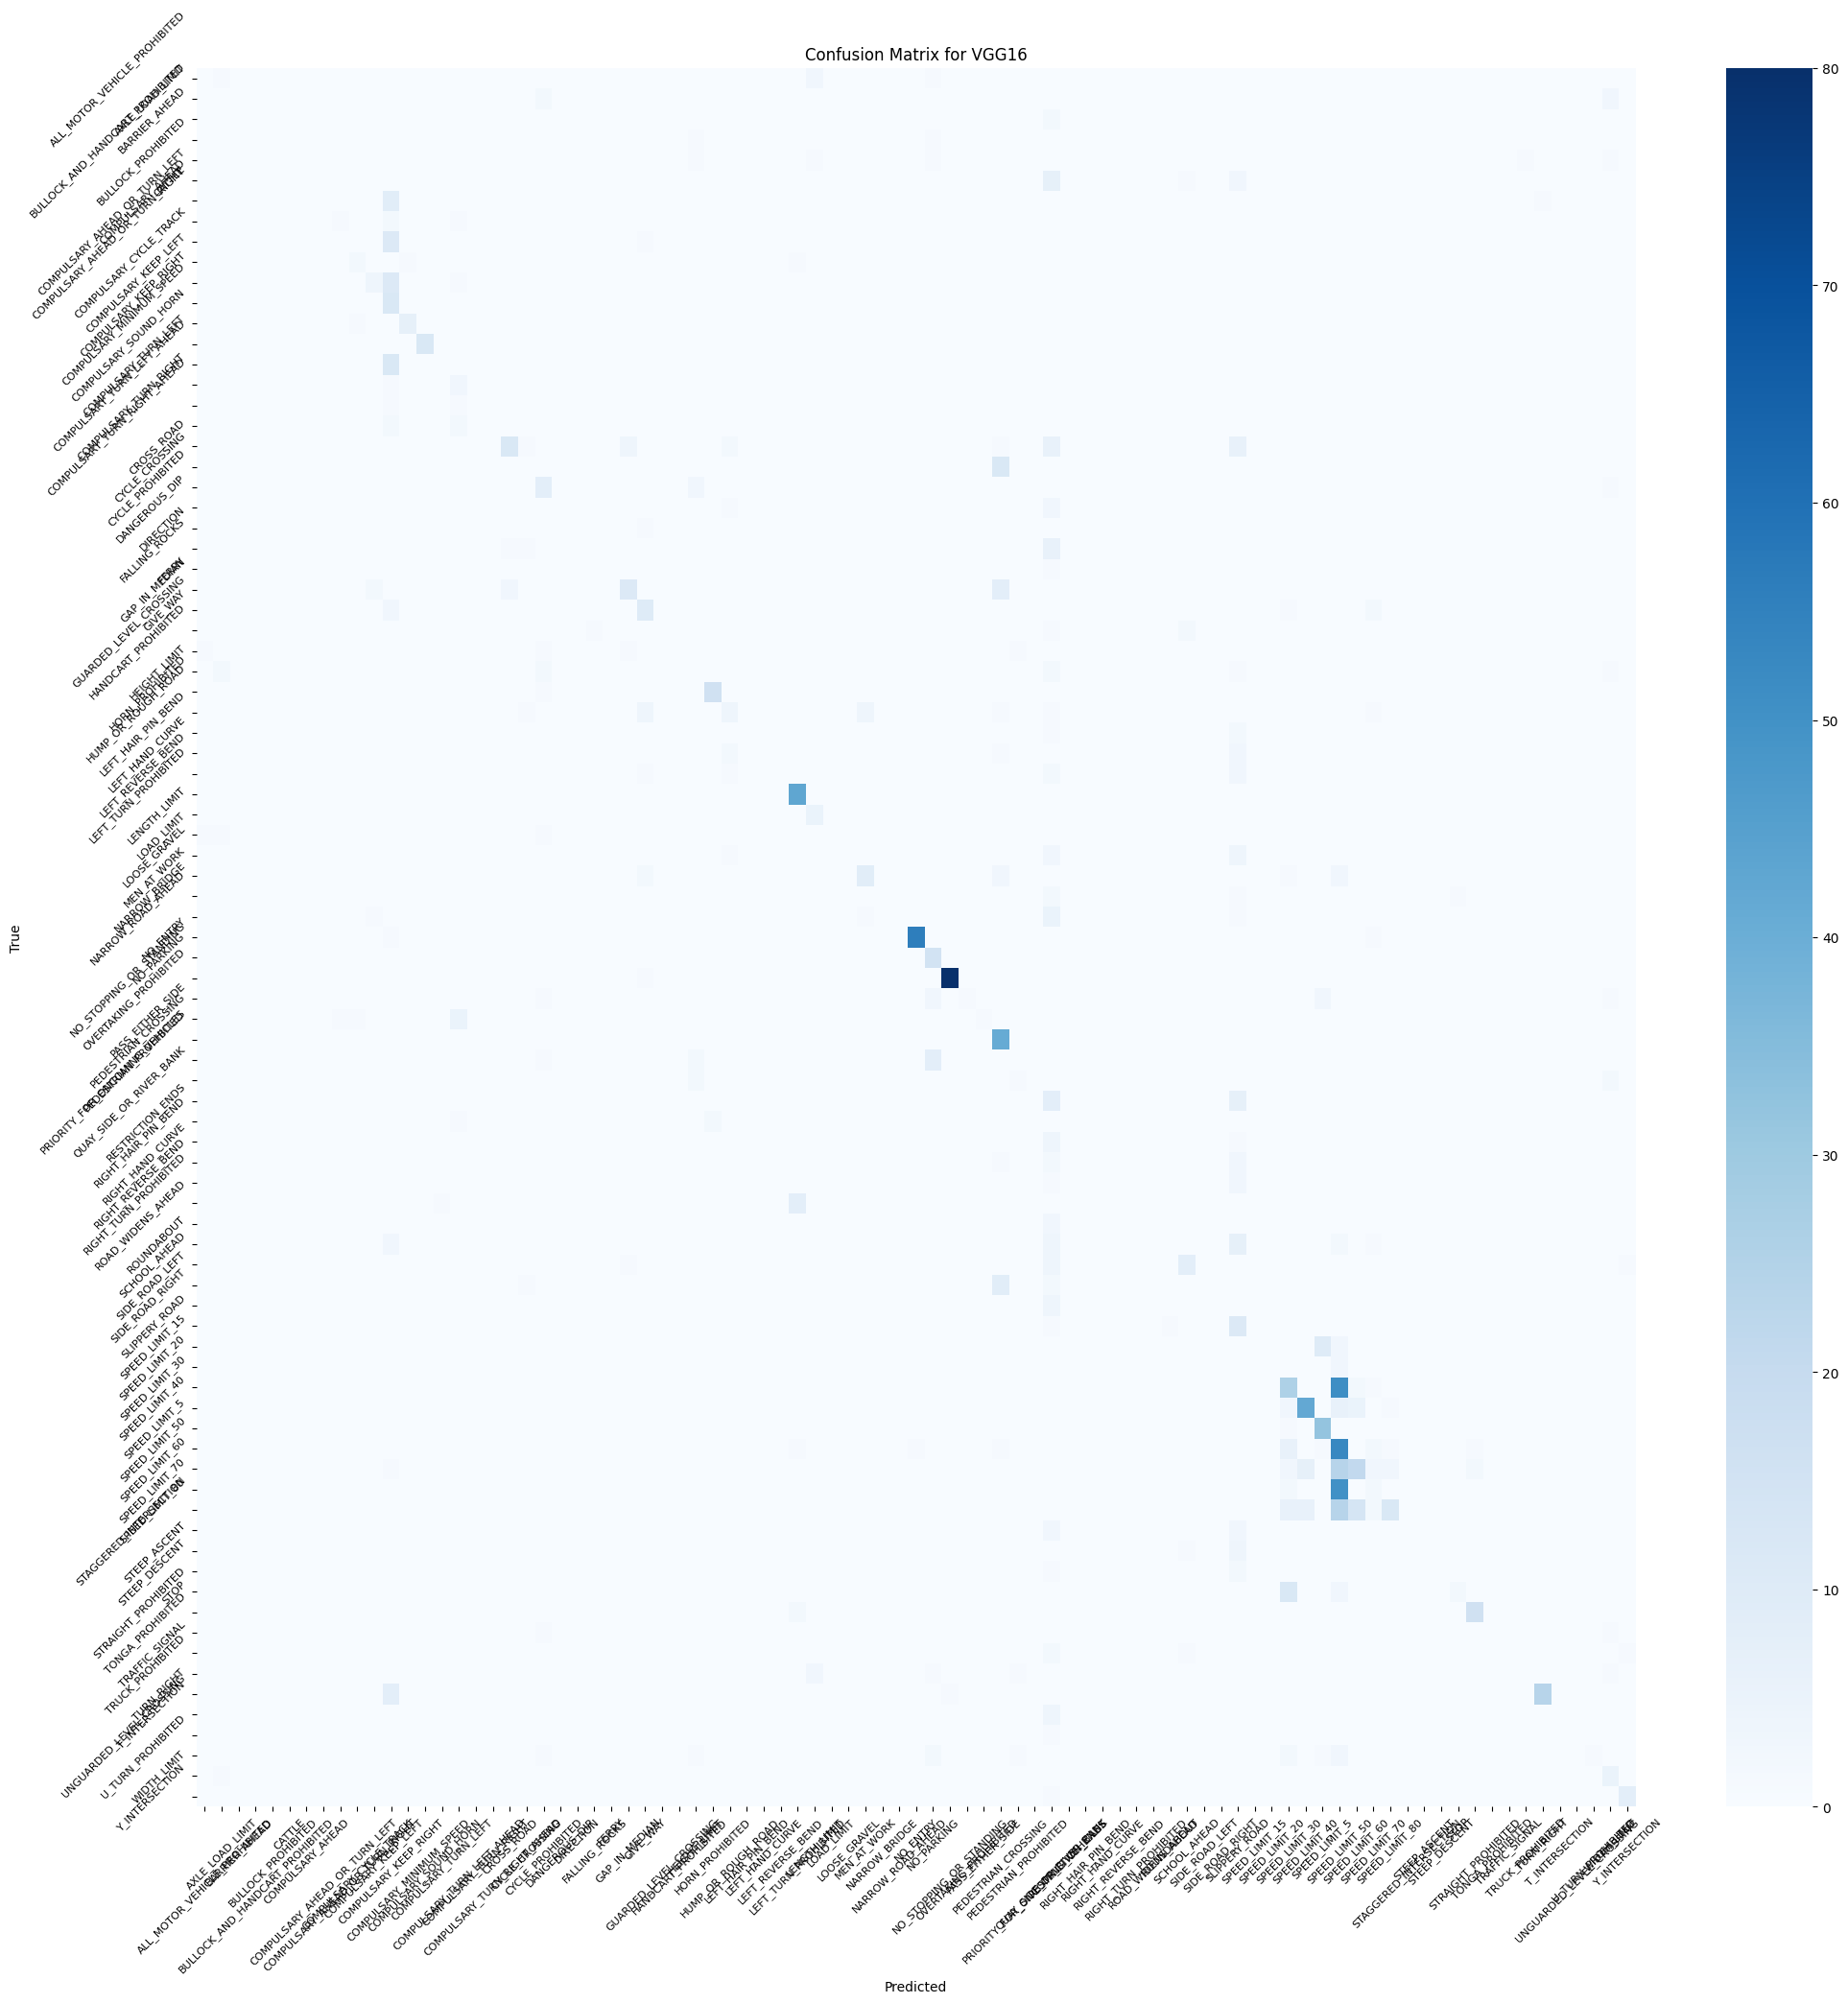

Confusion Matrix for MobileNetV2
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step


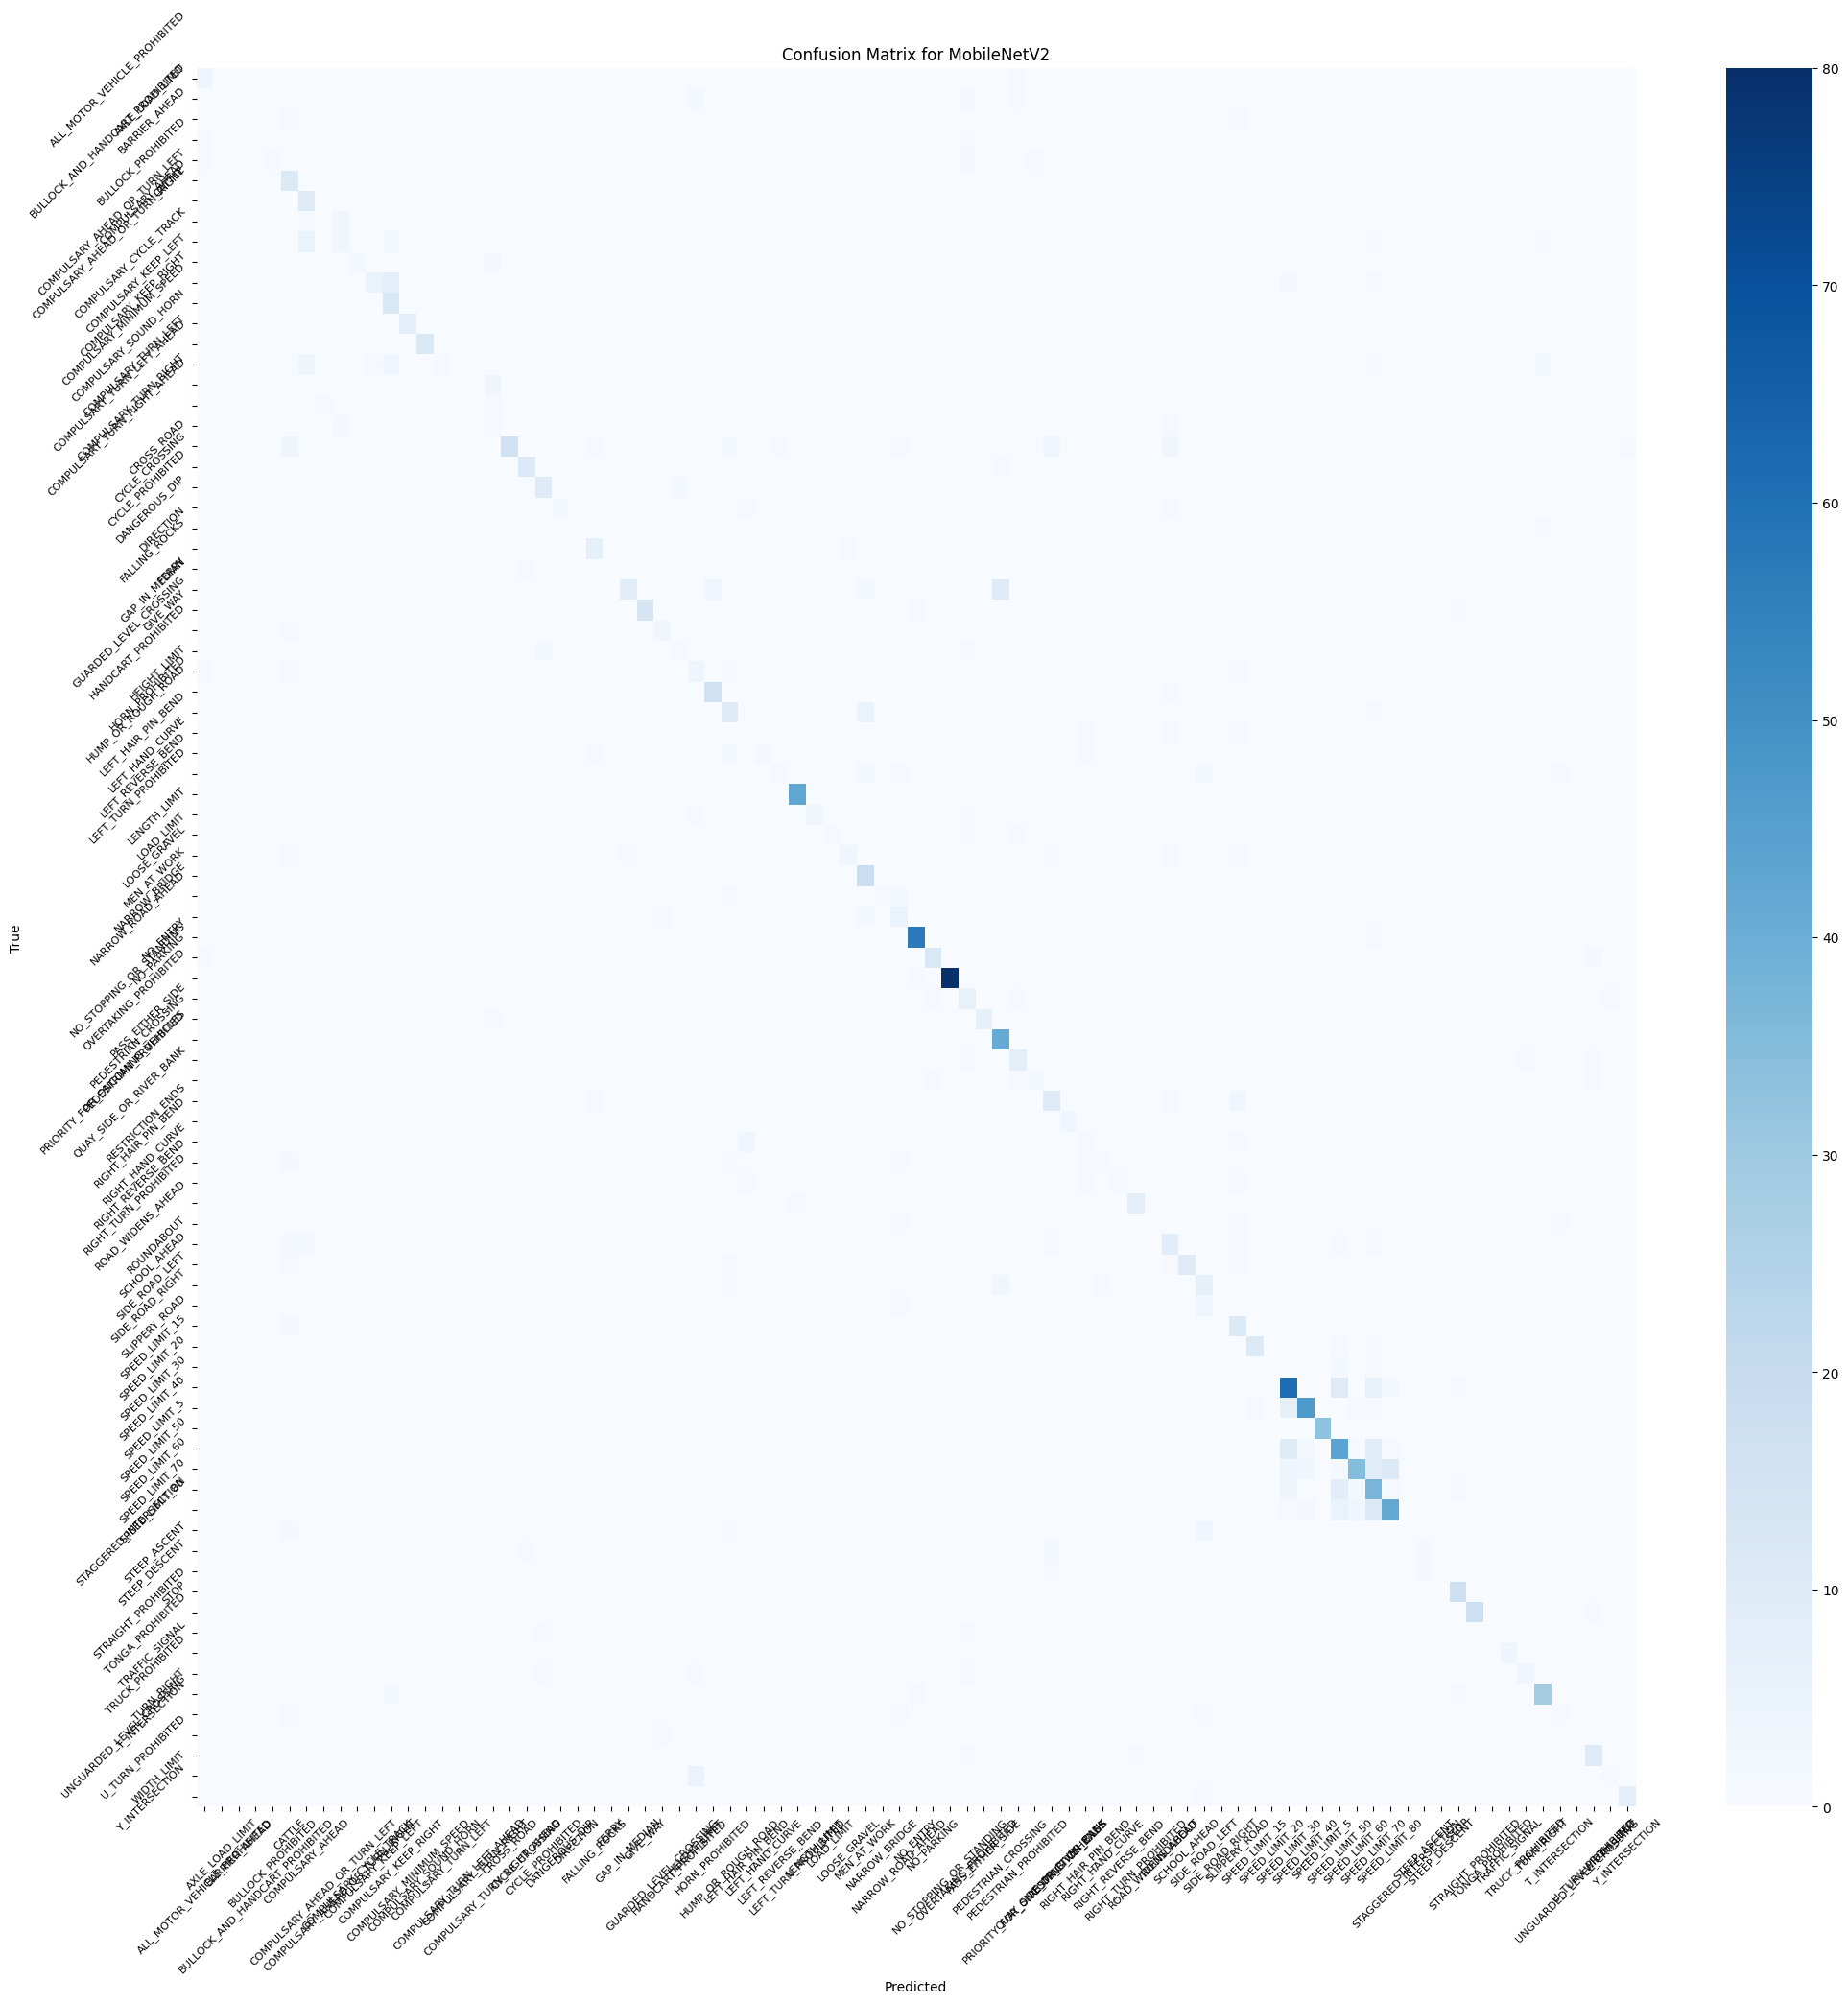

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Function to plot confusion matrix with dynamic scaling
def plot_confusion_matrix(model, test_generator, model_name):
    y_true = test_generator.classes
    y_pred = model.predict(test_generator, verbose=1)
    y_pred_classes = y_pred.argmax(axis=-1)

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    class_labels = list(test_generator.class_indices.keys())

    # Scale figure size based on number of classes
    fig_size = max(10, len(class_labels) // 4)  # Adjust based on the number of classes
    plt.figure(figsize=(fig_size, fig_size))

    sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}")
    plot_confusion_matrix(model, test_generator, model_name)


Best model (MobileNetV2) saved at: /content/best_model_mobilenetv2.keras
Model loaded successfully for prediction.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


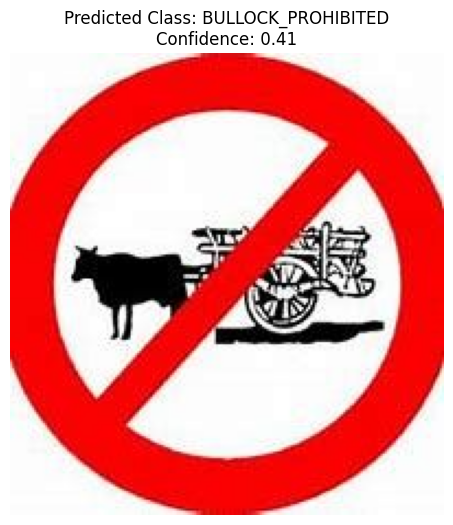

Predicted Class: BULLOCK_PROHIBITED
Prediction Probabilities: [7.2246999e-02 1.2734391e-04 3.9831382e-05 3.4793526e-02 4.0844342e-01
 5.5170740e-04 1.3633846e-07 2.6343801e-04 7.1424598e-05 3.7822672e-05
 3.8399742e-04 5.7103287e-05 1.3297047e-04 1.9928442e-04 3.7069050e-05
 3.1585019e-04 4.0298139e-05 4.0947556e-04 6.7245401e-06 1.2778491e-04
 5.9818830e-02 2.4434866e-04 1.4161971e-07 3.5925746e-05 3.8031554e-05
 7.1246967e-07 2.2095479e-07 5.4613560e-05 4.6784878e-02 3.7402459e-03
 1.1009410e-03 4.7642108e-05 3.6276298e-05 3.1071450e-04 1.6216672e-04
 1.0155685e-04 2.0878883e-03 3.5585320e-04 2.4428980e-05 7.7585803e-08
 1.8072284e-05 7.8145153e-05 1.6748069e-07 3.9718063e-03 1.1906660e-06
 5.2259479e-02 7.0904600e-05 6.2196335e-08 4.8062801e-03 2.1025315e-03
 2.6505411e-04 1.5814898e-04 1.7640943e-04 1.1223280e-04 3.2336087e-05
 9.9062476e-05 6.9562688e-05 1.4214781e-02 7.4346826e-06 9.1633756e-06
 1.9551528e-06 3.8671085e-05 2.8857307e-06 8.0764615e-08 8.0143363e-06
 1.0625334e-05 

In [21]:

import matplotlib.pyplot as plt


best_model_path = "/content/best_model_mobilenetv2.keras"
models["MobileNetV2"].save(best_model_path)
print(f"Best model (MobileNetV2) saved at: {best_model_path}")


def preprocess_image(image_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    img = load_img(image_path, target_size=target_size)

    img_array = img_to_array(img)

    img_array = img_array / 255.0

    img_array = tf.expand_dims(img_array, axis=0)
    return img_array


loaded_model = tf.keras.models.load_model(best_model_path)
print("Model loaded successfully for prediction.")


def predict_image_class(image_path, model, class_indices):

    img_array = preprocess_image(image_path)

    predictions = model.predict(img_array)

    predicted_class_index = tf.argmax(predictions[0]).numpy()

    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_name = class_labels[predicted_class_index]


    plt.figure(figsize=(6, 6))
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class_name}\nConfidence: {predictions[0][predicted_class_index]:.2f}")
    plt.show()

    return predicted_class_name, predictions[0]


test_image_path = "/content/drive/MyDrive/traffic_sign_classification_dataset/test/BULLOCK_PROHIBITED/04010.jpg"


predicted_class, prediction_probs = predict_image_class(test_image_path, loaded_model, train_generator.class_indices)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probs}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


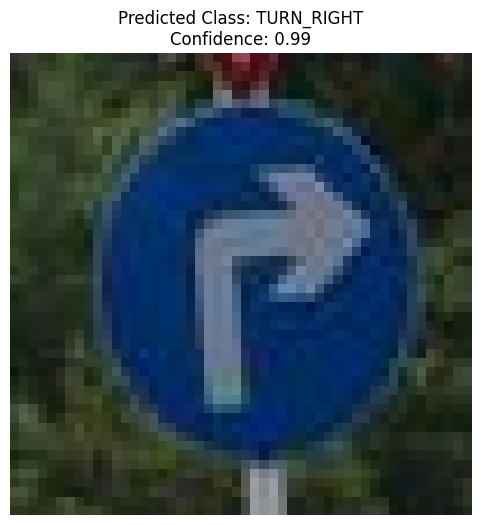

Predicted Class: TURN_RIGHT
Prediction Probabilities: [8.77210197e-13 2.23288553e-12 6.14275747e-14 1.77803693e-15
 3.88794438e-13 5.12237364e-10 1.47188302e-05 5.02214675e-07
 2.16607063e-04 1.30632091e-13 1.10474794e-07 1.58069481e-04
 8.34570867e-12 7.13476538e-07 6.02495857e-03 3.82991203e-08
 4.60928762e-09 1.51363815e-06 4.67945856e-11 5.90622717e-10
 8.27137858e-10 2.04298758e-10 3.41479875e-08 6.56599844e-11
 1.00422223e-11 9.72855752e-09 1.19307311e-08 1.39445590e-11
 4.33587655e-09 2.30131723e-13 2.20505314e-07 2.50303742e-08
 6.44305776e-14 7.89411470e-09 1.29706352e-08 2.56204599e-04
 4.67883815e-13 1.25592971e-12 2.10751199e-15 1.61235314e-09
 9.79848255e-13 7.27183980e-10 1.87151219e-08 5.53888446e-09
 4.74524642e-09 7.37156104e-14 6.34554596e-08 8.81999335e-11
 1.58800739e-12 1.21090624e-13 2.19524598e-09 3.10564248e-11
 1.30304809e-10 8.51674020e-09 1.19321913e-11 3.96482865e-05
 6.06131410e-13 3.45401054e-06 2.23741728e-12 3.11200120e-06
 2.34986249e-11 5.35273735e-12 

In [23]:
# Path to the test image
test_image_path = "/content/drive/MyDrive/traffic_sign_classification_dataset/test/TURN_RIGHT/80120.jpg"

# Perform prediction and show the image
predicted_class, prediction_probs = predict_image_class(test_image_path, loaded_model, train_generator.class_indices)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probs}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


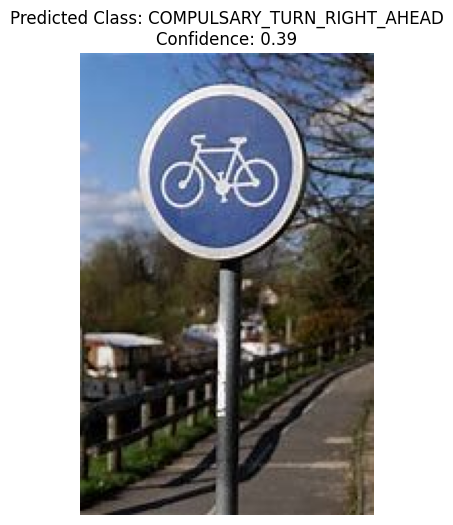

Predicted Class: COMPULSARY_TURN_RIGHT_AHEAD
Prediction Probabilities: [3.2638558e-04 2.9686884e-05 4.8282633e-08 4.5662841e-06 2.2117949e-06
 3.6662044e-05 2.7765191e-04 7.1848808e-03 1.3549390e-01 7.2759174e-02
 4.5080628e-02 7.5353184e-03 5.9887335e-02 6.9453008e-03 3.6112606e-03
 1.2696191e-02 6.8392418e-03 3.9329109e-01 1.1633230e-04 5.7664398e-05
 8.8525638e-03 3.4362735e-08 3.1948348e-06 9.7907405e-06 2.4213962e-06
 1.3986270e-02 1.6634991e-04 6.3503772e-05 2.2485808e-03 1.1485765e-03
 2.4841095e-03 1.6307144e-04 1.9608193e-07 8.3442933e-07 1.3584569e-05
 1.2793425e-03 3.6088077e-05 2.4877297e-04 1.2628576e-07 1.0759221e-05
 9.7932989e-06 2.1775801e-05 6.0419781e-05 9.0369031e-05 9.9389162e-03
 1.5915601e-05 8.9832760e-02 4.3134761e-04 3.0282629e-04 5.0850603e-04
 1.1648274e-03 2.4731273e-06 2.3657333e-06 1.6682199e-06 2.7672877e-07
 1.8678865e-04 5.3798690e-08 5.7392418e-03 6.2362035e-03 1.1276658e-06
 8.4442231e-09 3.5970818e-06 3.2178697e-04 6.7727058e-05 8.7474413e-02
 3.060

In [22]:

test_image_path = "/content/drive/MyDrive/traffic_sign_classification_dataset/test/COMPULSARY_CYCLE_TRACK/09000.jpg"


predicted_class, prediction_probs = predict_image_class(test_image_path, loaded_model, train_generator.class_indices)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probs}")